In [1]:
change_bright <- read.csv("data/change_bright.csv")
str(change_bright)
head(change_bright)

'data.frame':	117 obs. of  13 variables:
 $ X          : int  0 1 2 3 4 5 6 7 8 9 ...
 $ sex        : Factor w/ 2 levels "Female","Male": 2 1 1 1 1 1 1 2 1 1 ...
 $ age_class  : int  20 20 20 20 20 20 20 20 20 20 ...
 $ definition : Factor w/ 2 levels "bright","harmony": 2 1 1 2 1 2 2 2 2 1 ...
 $ need       : Factor w/ 2 levels "bright","harmony": 2 2 1 2 1 2 2 2 2 1 ...
 $ purpose    : Factor w/ 3 levels "clothes","cosmetic",..: 1 1 1 1 3 3 3 1 1 1 ...
 $ interest   : int  5 5 3 3 4 2 5 3 4 4 ...
 $ comp       : int  4 1 2 5 4 3 1 1 1 5 ...
 $ triangle1  : int  5 1 4 5 2 4 4 1 4 5 ...
 $ triangle2  : int  2 2 1 4 1 1 5 3 1 2 ...
 $ doubleness1: int  3 2 2 5 1 2 3 1 1 2 ...
 $ doubleness2: int  2 3 1 4 2 2 3 5 2 1 ...
 $ doubleness3: int  2 2 2 1 2 2 3 5 2 5 ...


X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


In [80]:
library(dplyr)
library(plyr)

Warning message:
"package 'plyr' was built under R version 3.6.3"------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



In [96]:
comp <- change_bright %>% select(c(sex, definition, need, purpose, interest, comp))

In [98]:
head(comp)

sex,definition,need,purpose,interest,comp
Male,harmony,harmony,clothes,5,4
Female,bright,harmony,clothes,5,1
Female,bright,bright,clothes,3,2
Female,harmony,harmony,clothes,3,5
Female,bright,bright,etc,4,4
Female,harmony,harmony,etc,2,3


In [103]:
table(comp$comp, comp$sex, comp$definition, comp$need)

, ,  = bright,  = bright

   
    Female Male
  1      5    0
  2      6    0
  3      3    1
  4      3    0
  5      3    1

, ,  = harmony,  = bright

   
    Female Male
  1      5    3
  2      2    2
  3      1    0
  4      4    0
  5      5    1

, ,  = bright,  = harmony

   
    Female Male
  1      1    1
  2      0    0
  3      1    1
  4      1    0
  5      2    0

, ,  = harmony,  = harmony

   
    Female Male
  1     23    6
  2      7    2
  3      8    2
  4      2    3
  5      8    4


In [ ]:
# 전처리가 필요없는 컬럼
cols_to_keep = ['comp']

In [104]:
dummy_sex = pd.get_dummies(comp['Sex'], prefix='Sex')
dummy_sex.head()

ERROR: Error in pd.get_dummies(comp["Sex"], prefix = "Sex"): 함수 "pd.get_dummies"를 찾을 수 없습니다


In [78]:
comp_harmony <- change_bright %>% group_by(comp) %>% filter(definition=='harmony') %>% summarise(count=n())
comp_bright <- change_bright %>% group_by(comp) %>% filter(definition=='bright') %>% summarise(count=n())

In [81]:
comp_definition <- join(comp_harmony, comp_bright, by='comp', type='left')

In [83]:
comp_definition$harmony = comp_definition$count

In [89]:
comp_definition$bright = comp_definition$count

In [90]:
comp_definition

comp,count,count,harmony,bright
1,37,7,37,37
2,13,6,13,13
3,11,6,11,11
4,9,4,9,9
5,18,6,18,18


In [46]:
change_bright %>% group_by(triangle1) %>% filter(definition=='harmony') %>% summarise(count=n())
change_bright %>% group_by(triangle1) %>% filter(definition=='bright') %>% summarise(count=n())

triangle1,count
1,22
2,7
3,11
4,35
5,13


triangle1,count
1,2
2,9
3,6
4,8
5,4


In [47]:
change_bright %>% group_by(triangle2) %>% filter(definition=='harmony') %>% summarise(count=n())
change_bright %>% group_by(triangle2) %>% filter(definition=='bright') %>% summarise(count=n())

triangle2,count
1,19
2,23
3,18
4,14
5,14


triangle2,count
1,9
2,5
3,6
4,4
5,5


In [48]:
change_bright %>% group_by(doubleness1) %>% filter(definition=='harmony') %>% summarise(count=n())
change_bright %>% group_by(doubleness1) %>% filter(definition=='bright') %>% summarise(count=n())

doubleness1,count
1,18
2,26
3,14
4,20
5,10


doubleness1,count
1,8
2,13
3,2
4,3
5,3


In [49]:
change_bright %>% group_by(doubleness2) %>% filter(definition=='harmony') %>% summarise(count=n())
change_bright %>% group_by(doubleness2) %>% filter(definition=='bright') %>% summarise(count=n())

doubleness2,count
1,34
2,12
3,13
4,18
5,11


doubleness2,count
1,10
2,9
3,2
4,4
5,4


In [50]:
change_bright %>% group_by(doubleness3) %>% filter(definition=='harmony') %>% summarise(count=n())
change_bright %>% group_by(doubleness3) %>% filter(definition=='bright') %>% summarise(count=n())

doubleness3,count
1,13
2,17
3,22
4,14
5,22


doubleness3,count
1,6
2,5
3,5
4,5
5,8


In [30]:
## 데이터프레임 재생성
# 성별

Male_T <- with(change_bright, sum(comp[comp==1]))
# Male_F <- with(change_bright, sum(cheek[sex=="Male"], forehead[sex=="Male"], eyes[sex=="Male"], face[sex=="Male"]))
# Female_T <- with(change_bright, sum(chin[sex=="Female"]))
# Female_F <- with(change_bright, sum(cheek[sex=="Female"], forehead[sex=="Female"], eyes[sex=="Female"], face[sex=="Female"]))

# Male <- c(Male_T, Male_F)
# Female <- c(Female_T, Female_F)

# df_Sex_Region <- data.frame(Male, Female)
# df_Sex_Region <- t(df_Sex_Region)
# colnames(df_Sex_Region) <- c("True", "False")

In [31]:
Male_T

[1] NA

In [2]:
# install.packages("ggplot2")
library("ggplot2")

Installing package into 'C:/Users/acorn/Documents/R/win-library/3.6'
(as 'lib' is unspecified)


package 'ggplot2' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\acorn\AppData\Local\Temp\RtmpqwFqLx\downloaded_packages


Warning message:
"package 'ggplot2' was built under R version 3.6.3"

In [58]:
head(change_bright)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


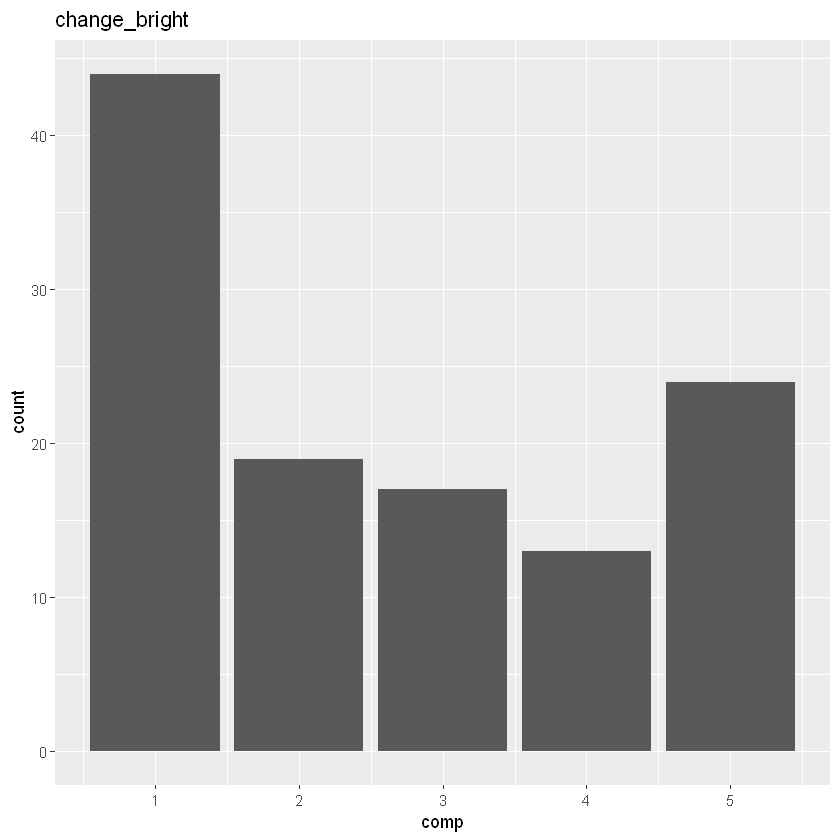

In [3]:
ggplot(change_bright, aes(comp)) + geom_bar(position="dodge") + labs(title = "comp_all")

In [59]:
head(comp_harmony)

comp,count
1,37
2,13
3,11
4,9
5,18


Warning message:
"Use of `comp_harmony$comp` is discouraged. Use `comp` instead."Warning message:
"Use of `comp_harmony$count` is discouraged. Use `count` instead."

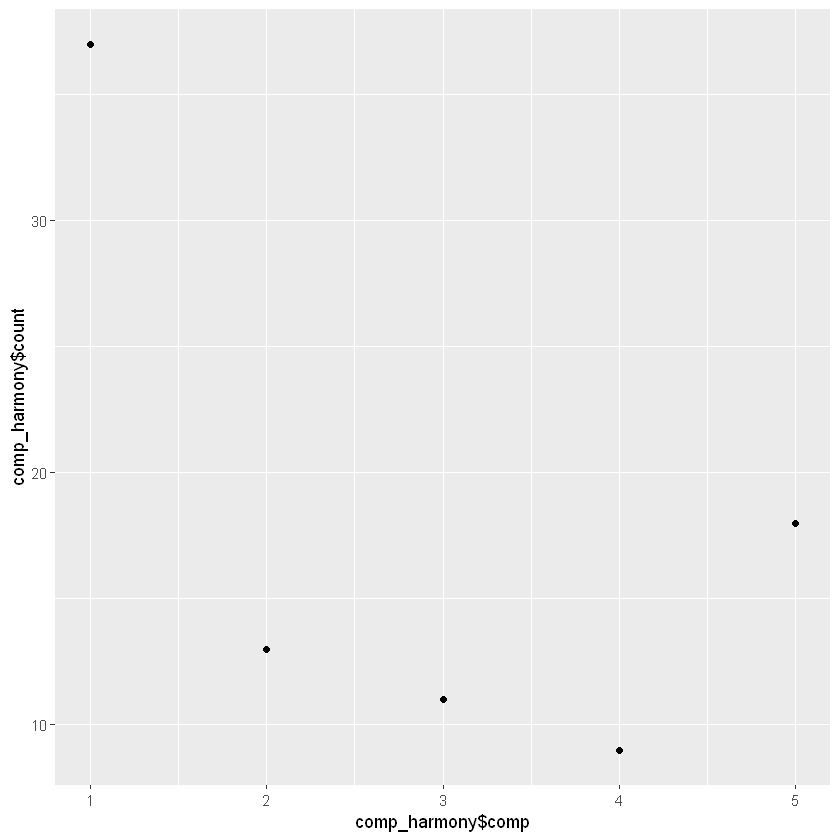

In [70]:
ggplot(comp_harmony, aes(x=comp_harmony$comp, y=comp_harmony$count)) + geom_point()

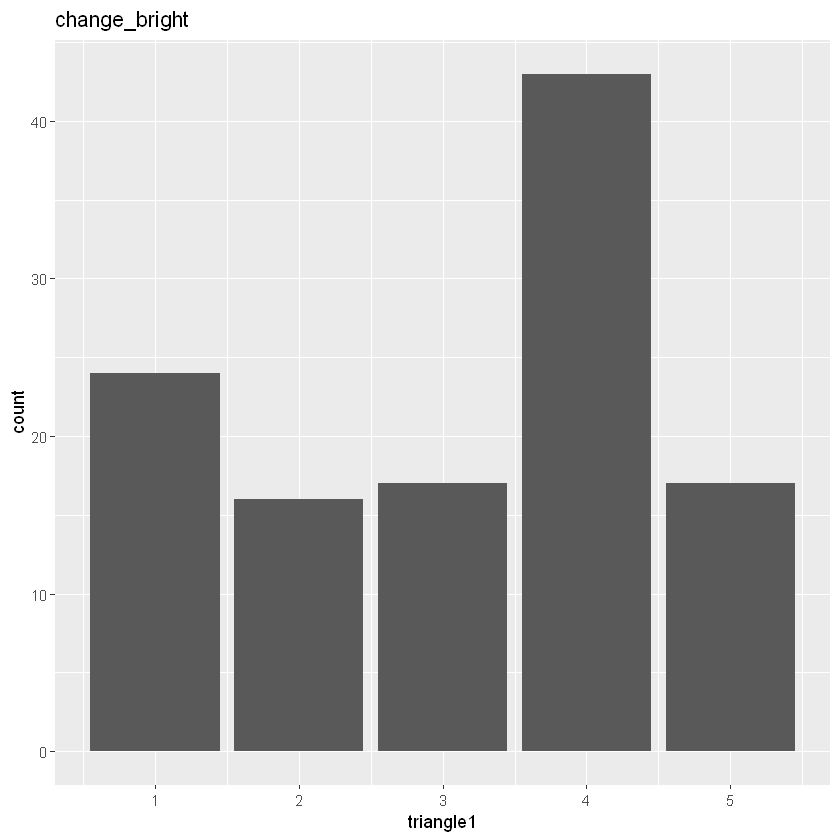

In [4]:
ggplot(change_bright, aes(triangle1)) + geom_bar(position="dodge") + labs(title = "triangle1_all")

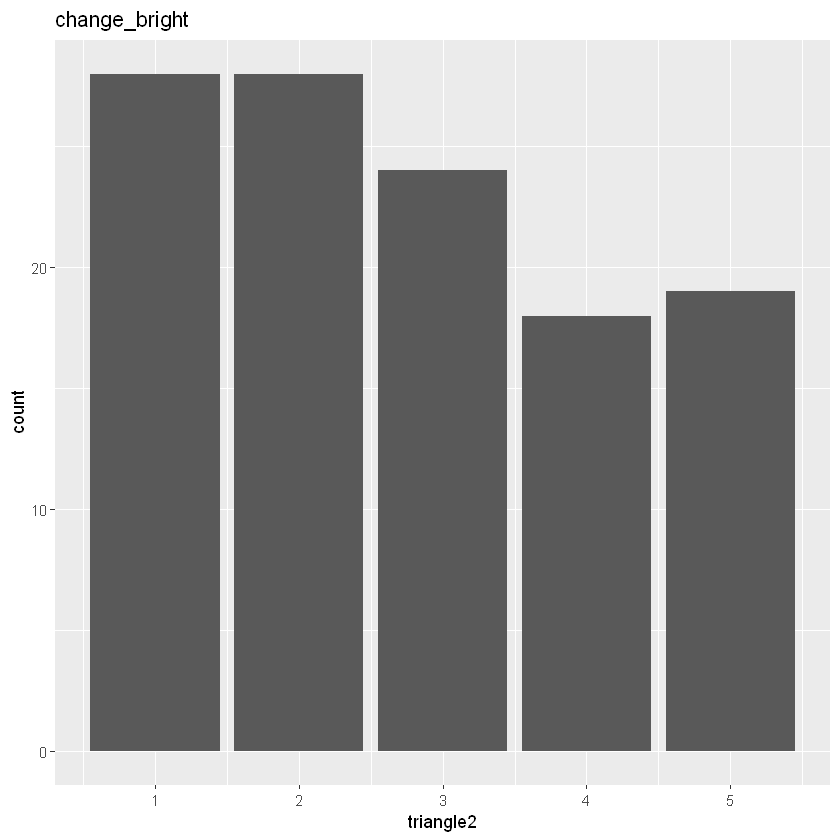

In [5]:
ggplot(change_bright, aes(triangle2)) + geom_bar(position="dodge") + labs(title = "triangle2_all")

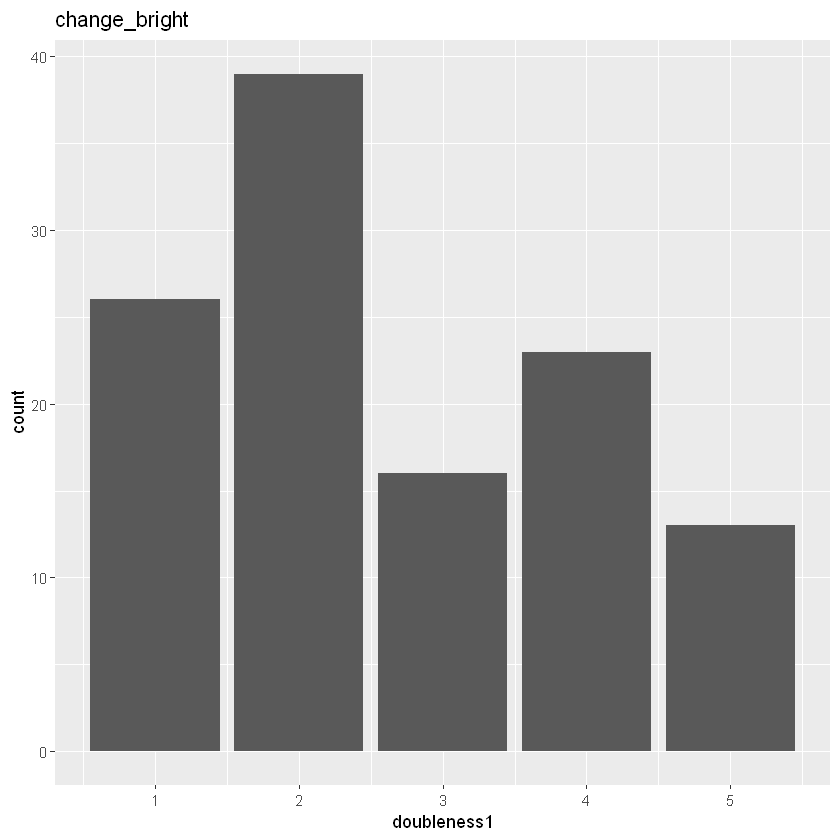

In [6]:
ggplot(change_bright, aes(doubleness1)) + geom_bar(position="dodge") + labs(title = "doubleness1_all")

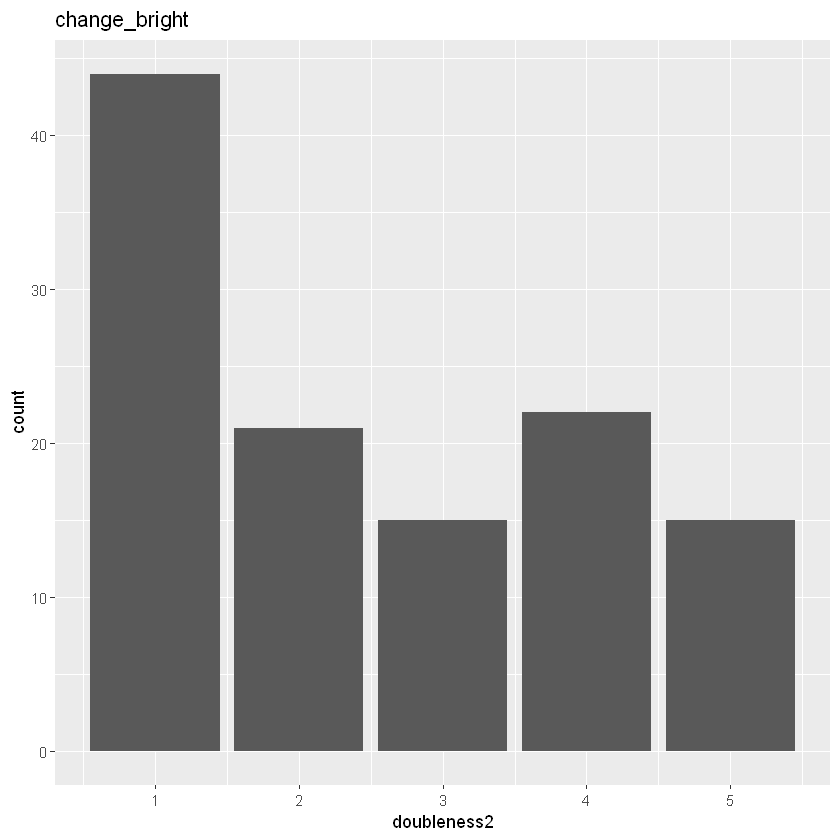

In [7]:
ggplot(change_bright, aes(doubleness2)) + geom_bar(position="dodge") + labs(title = "doubleness2_all")

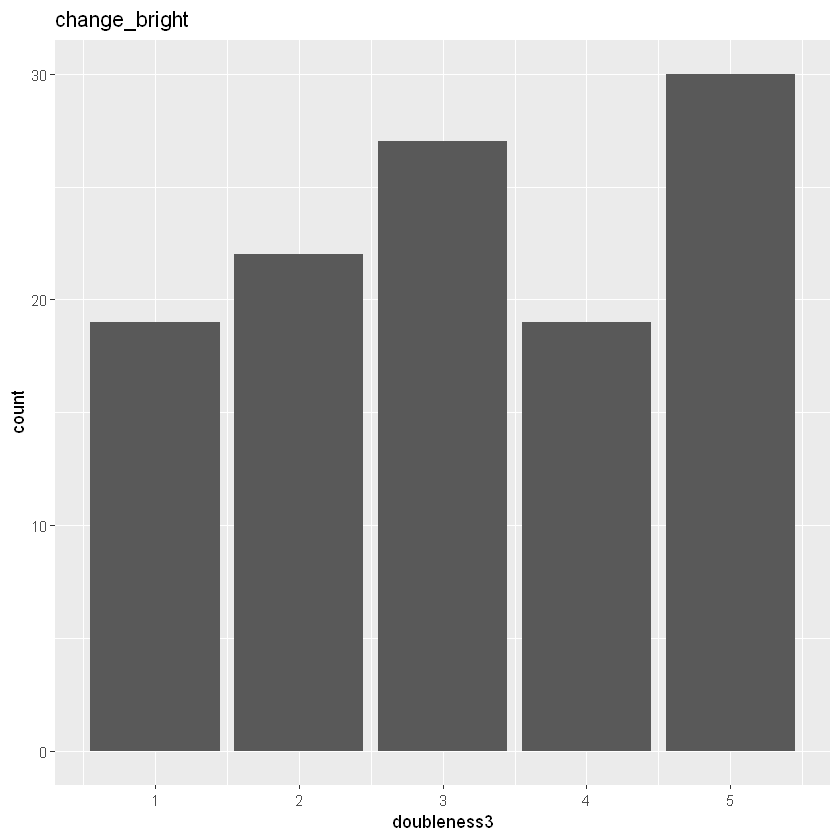

In [8]:
ggplot(change_bright, aes(doubleness3)) + geom_bar(position="dodge") + labs(title = "doubleness2_all")

In [10]:
head(change_bright)

X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
1,Female,20,bright,harmony,clothes,5,1,1,2,2,3,2
2,Female,20,bright,bright,clothes,3,2,4,1,2,1,2
3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
4,Female,20,bright,bright,etc,4,4,2,1,1,2,2
5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2


In [14]:
definition <- change_bright[change_bright$definition=='harmony', ]

In [16]:
head(definition)

,X,sex,age_class,definition,need,purpose,interest,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
1,0,Male,20,harmony,harmony,clothes,5,4,5,2,3,2,2
4,3,Female,20,harmony,harmony,clothes,3,5,5,4,5,4,1
6,5,Female,20,harmony,harmony,etc,2,3,4,1,2,2,2
7,6,Female,20,harmony,harmony,etc,5,1,4,5,3,3,3
8,7,Male,20,harmony,harmony,clothes,3,1,1,3,1,5,5
9,8,Female,20,harmony,harmony,clothes,4,1,4,1,1,2,2


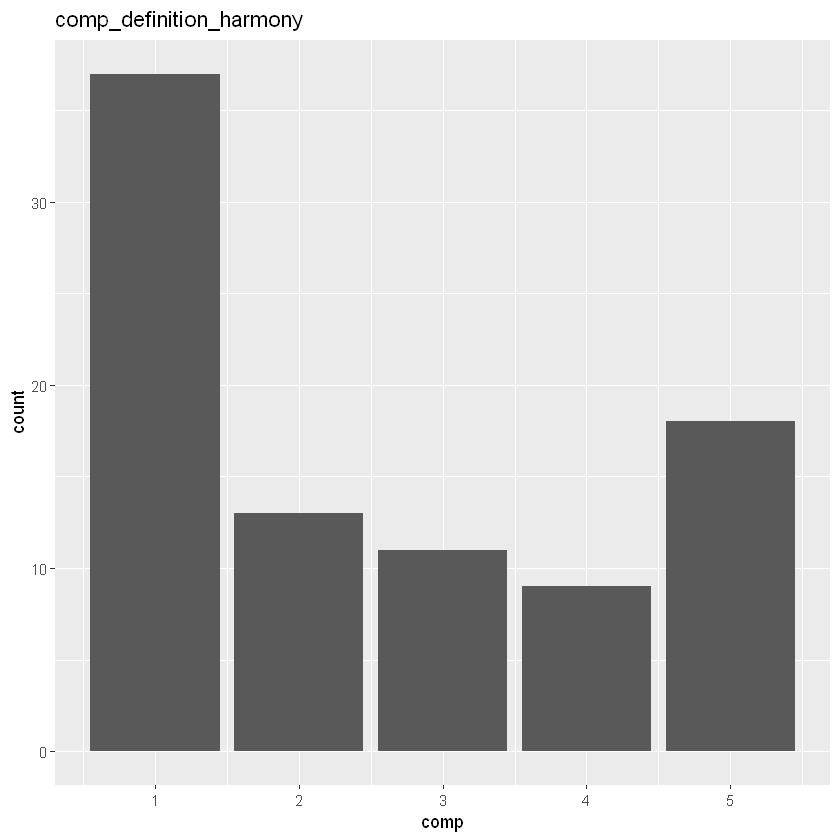

In [17]:
ggplot(definition, aes(comp)) + geom_bar(position="dodge") + labs(title = "comp_definition_harmony")

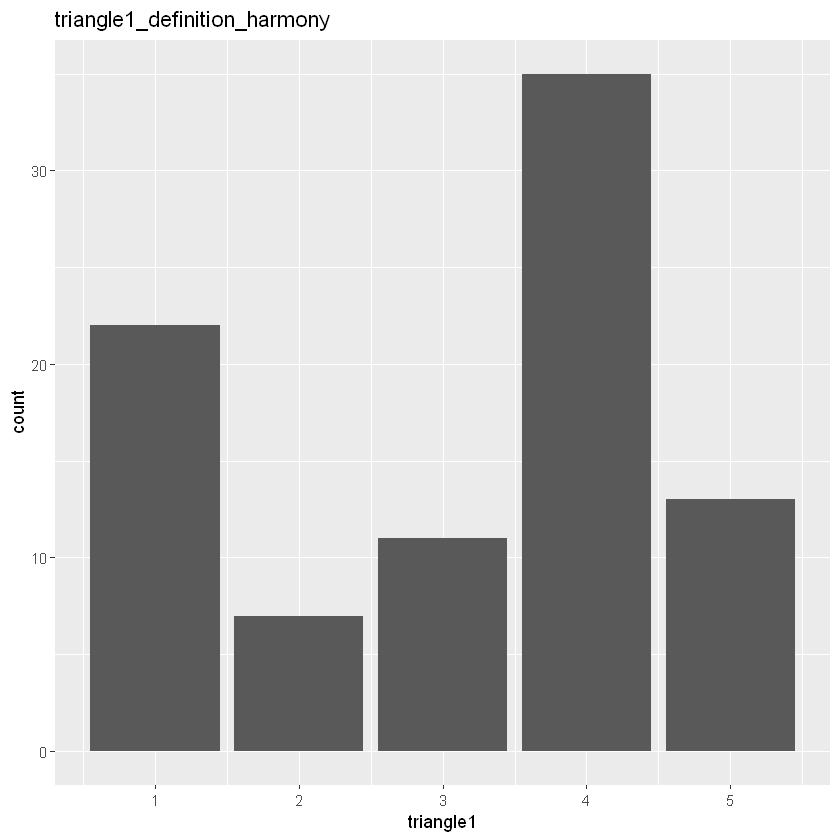

In [18]:
ggplot(definition, aes(triangle1)) + geom_bar(position="dodge") + labs(title = "triangle1_definition_harmony")

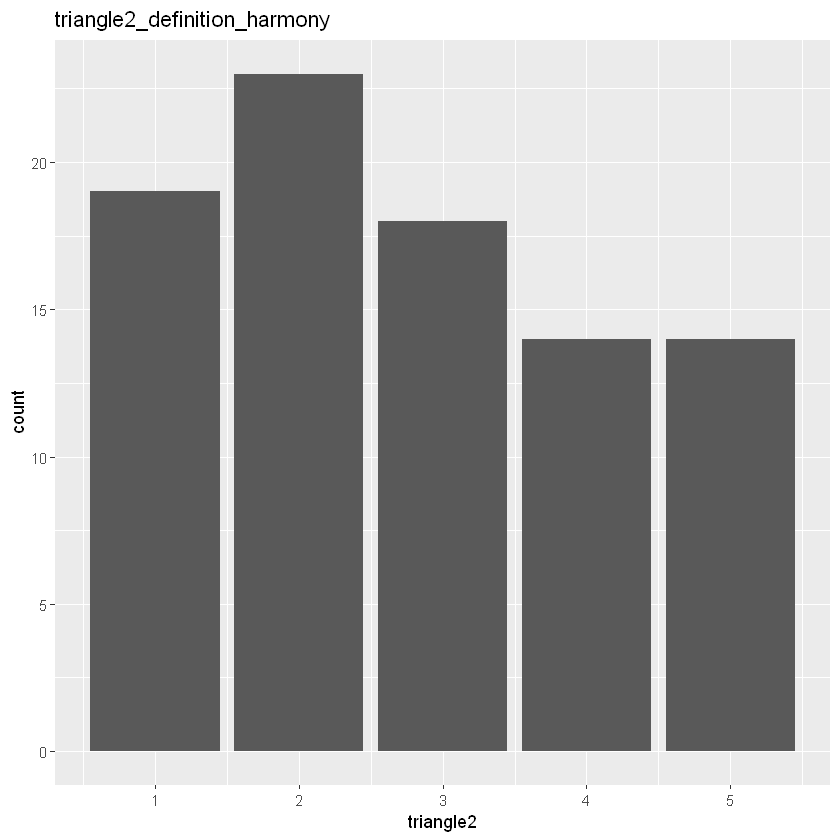

In [24]:
ggplot(definition, aes(triangle2)) + geom_bar(position="dodge") + labs(title = "triangle2_definition_harmony")

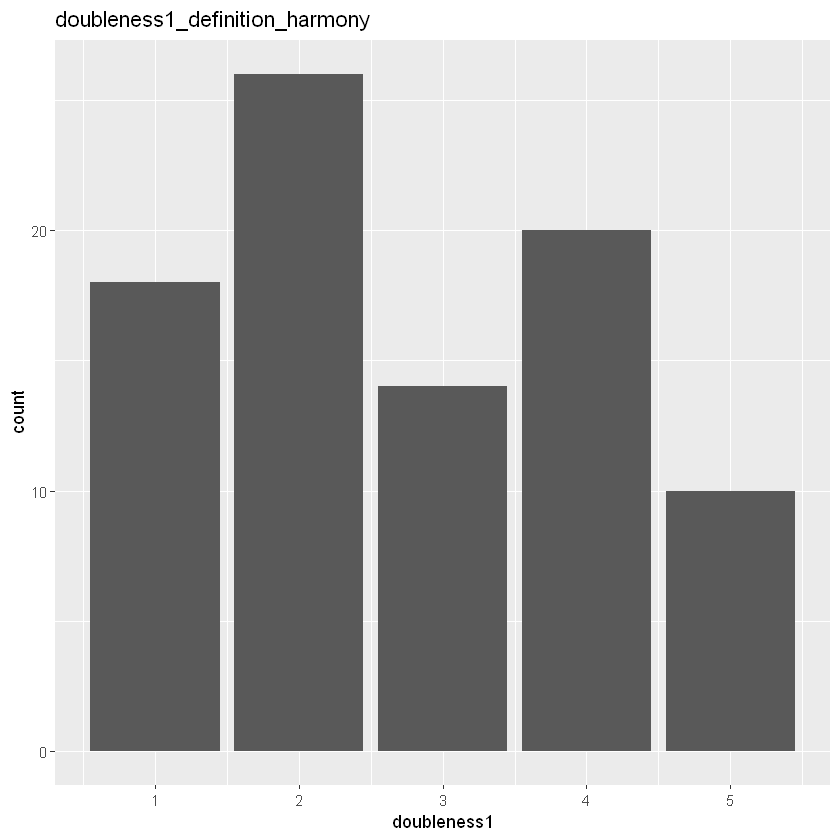

In [25]:
ggplot(definition, aes(doubleness1)) + geom_bar(position="dodge") + labs(title = "doubleness1_definition_harmony")

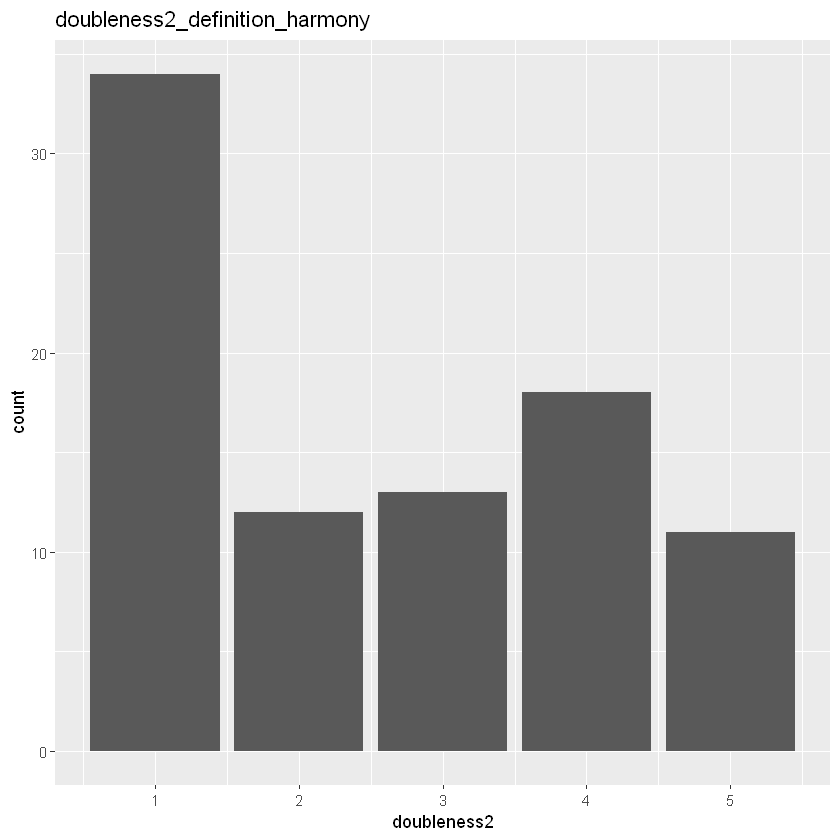

In [26]:
ggplot(definition, aes(doubleness2)) + geom_bar(position="dodge") + labs(title = "doubleness2_definition_harmony")

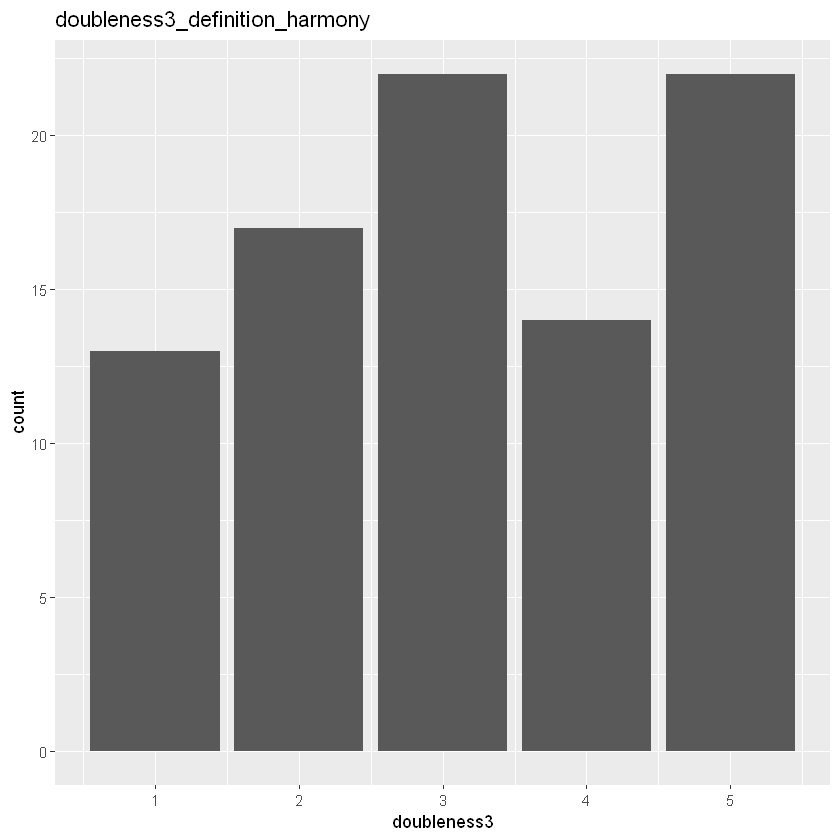

In [27]:
ggplot(definition, aes(doubleness3)) + geom_bar(position="dodge") + labs(title = "doubleness3_definition_harmony")

In [27]:
count(hueChanged_bright[hueChanged_bright$comp==144, ])

n
45


In [28]:
head(hueChanged_bright[hueChanged_bright$comp==216, ])

,X,sex,age_class,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
2,1,Female,20,216,144,288,144,original,216
8,7,Male,20,216,216,144,144,72,216
10,9,Female,20,216,144,216,216,144,144
11,10,Female,20,216,216,216,216,216,216
13,12,Female,20,216,144,216,72,144,72
18,17,Female,20,216,216,288,original,288,216


In [29]:
count(hueChanged_bright[hueChanged_bright$comp==216, ])

n
23


In [30]:
head(hueChanged_bright[hueChanged_bright$comp==288, ])

,X,sex,age_class,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
3,2,Female,20,288,216,216,original,144,216
7,6,Female,20,288,original,288,original,original,216
15,14,Female,20,288,144,216,288,144,original
16,15,Female,50,288,original,288,original,288,288
37,36,Female,20,288,216,288,288,288,288
38,37,Male,20,288,144,216,216,216,original


In [31]:
count(hueChanged_bright[hueChanged_bright$comp==288, ])

n
18


In [32]:
head(hueChanged_bright[hueChanged_bright$comp==72, ])

,X,sex,age_class,comp,triangle1,triangle2,doubleness1,doubleness2,doubleness3
9,8,Female,20,72,72,144,72,original,72
14,13,Female,20,72,144,216,original,72,72
21,20,Female,20,72,216,144,216,72,72
22,21,Female,20,72,72,72,72,72,72
39,38,Male,20,72,72,288,144,144,144
44,43,Female,20,72,72,144,72,72,72


In [33]:
count(hueChanged_bright[hueChanged_bright$comp==72, ])

n
19


In [36]:
head(hueChanged_bright[hueChanged_bright$comp==original, ])

ERROR: Error in `[.data.frame`(hueChanged_bright, hueChanged_bright$comp == original, : 객체 'original'를 찾을 수 없습니다


In [35]:
count(hueChanged_bright[hueChanged_bright$comp==original, ])

ERROR: Error in `[.data.frame`(hueChanged_bright, hueChanged_bright$comp == original, : 객체 'original'를 찾을 수 없습니다


In [47]:
hueFixed_bright1 = pd.read_excel("data/퍼스널컬러 정량화 모델 가설검정을 위한 설문 (1).xlsx",
                          sheet_name = 'Sheet1', header=0,na_values = 'NaN',
                          usecols="M, N, O, P, Q, R")

ERROR: Error in pd.read_excel("data/퍼스널컬러 정량화 모델 가설검정을 위한 설문 (1).xlsx", : 함수 "pd.read_excel"를 찾을 수 없습니다


In [8]:
install.packages('plyr')

library(plyr)

Installing package into 'C:/Users/USER/AppData/Roaming/SPB_Data/R/win-library/3.6'
(as 'lib' is unspecified)


package 'plyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpiWctzc\downloaded_packages


Warning message:
"package 'plyr' was built under R version 3.6.3"

In [16]:
install.packages("dplyr")
library(dplyr)

Installing package into 'C:/Users/USER/AppData/Roaming/SPB_Data/R/win-library/3.6'
(as 'lib' is unspecified)


package 'dplyr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\USER\AppData\Local\Temp\RtmpiWctzc\downloaded_packages


Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [19]:
exam <- read.csv('C:\\Users\\USER\\Desktop\\r\\BasicProject\\data/csv_exam.csv')
exam

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
5,2,25,80,65
6,2,50,89,98
7,2,80,90,45
8,2,90,78,25
9,3,20,98,15
10,3,50,98,45


In [11]:
ddply(iris, .(Species), summarize, avg=mean(Sepal.Length))

Species,avg
setosa,5.006
versicolor,5.936
virginica,6.588


In [20]:
exam[exam$class==1,]

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


In [22]:
exam %>% filter(class==1)

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


In [23]:
exam %>% filter(class %in% c(1, 3, 5))

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65
12,3,45,85,32
17,5,65,68,98
18,5,80,78,90
